In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import tabulate
import time
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
kernel_types = ['linear', 'rbf']
C_values = [0.001, 0.01, 0.1, 1.0, 10]

# 1 sekundowe pliki

## 13 cech

In [3]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_13_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_13_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [4]:
svm_results = []

for kernel in kernel_types:
    for C in C_values:
            try:
                clf = SVC(kernel=kernel, C=C, random_state=42)

                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                y_pred = clf.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                svm_results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with Kernel={kernel}, C={C} {e}")


metrics_svc = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_svc_models = {metric: max(svm_results, key=lambda x: x[metric]) for metric in metrics_svc}
best_svc_models['Training Time'] = min(svm_results, key=lambda x: x['Training Time (s)'])


all_models_svc_table = [
    [res['Kernel'], res['C'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in svm_results
]

best_models_svc_table = [
    [metric, 
     best_svc_models[metric]['Kernel'], 
     best_svc_models[metric]['C'],  
     best_svc_models[metric]['Accuracy'], 
     best_svc_models[metric]['Precision'], 
     best_svc_models[metric]['Recall'], 
     best_svc_models[metric]['F1 Score'], 
     best_svc_models[metric]['Training Time (s)']]
    for metric in metrics_svc + ['Training Time']
]

print("Best Models (SVC):")
print(tabulate(best_models_svc_table, headers=[
    "Metric", "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


Best Models for Each Metric (SVC):
╒═══════════════╤══════════╤═════╤════════════╤═════════════╤══════════╤════════════╤═════════════════════╕
│ Metric        │ Kernel   │   C │   Accuracy │   Precision │   Recall │   F1 Score │   Training Time (s) │
╞═══════════════╪══════════╪═════╪════════════╪═════════════╪══════════╪════════════╪═════════════════════╡
│ Accuracy      │ rbf      │  10 │   0.901205 │    0.900075 │ 0.901205 │   0.900402 │             7.61169 │
├───────────────┼──────────┼─────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Precision     │ rbf      │  10 │   0.901205 │    0.900075 │ 0.901205 │   0.900402 │             7.61169 │
├───────────────┼──────────┼─────┼────────────┼─────────────┼──────────┼────────────┼─────────────────────┤
│ Recall        │ rbf      │  10 │   0.901205 │    0.900075 │ 0.901205 │   0.900402 │             7.61169 │
├───────────────┼──────────┼─────┼────────────┼─────────────┼──────────┼────────────┼────────────────

In [5]:
print(tabulate(all_models_svc_table, headers=[
    "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

╒══════════╤══════════╤══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Metric   │   Kernel │        C │   Accuracy │   Precision │   Recall │   F1 Score │
╞══════════╪══════════╪══════════╪════════════╪═════════════╪══════════╪════════════╡
│ linear   │    0.001 │ 0.843223 │   0.841165 │    0.843223 │ 0.841656 │   16.5929  │
├──────────┼──────────┼──────────┼────────────┼─────────────┼──────────┼────────────┤
│ linear   │    0.01  │ 0.843373 │   0.841303 │    0.843373 │ 0.84177  │   47.3882  │
├──────────┼──────────┼──────────┼────────────┼─────────────┼──────────┼────────────┤
│ linear   │    0.1   │ 0.843373 │   0.84133  │    0.843373 │ 0.841777 │  306.081   │
├──────────┼──────────┼──────────┼────────────┼─────────────┼──────────┼────────────┤
│ linear   │    1     │ 0.844428 │   0.842573 │    0.844428 │ 0.84289  │ 1758.19    │
├──────────┼──────────┼──────────┼────────────┼─────────────┼──────────┼────────────┤
│ linear   │   10     │ 0.841717 │   0.840032 │    0.8

 SVM:
  Dokładność (Accuracy): 0.9012
  Precyzja (Precision): 0.9001
  Recall: 0.9012
  F1 Score: 0.9004
  Czas treningu: 5.6092 sekund

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1660
           1       0.85      0.80      0.82      1660
           2       0.87      0.87      0.87      1660
           3       0.96      0.98      0.97      1660

    accuracy                           0.90      6640
   macro avg       0.90      0.90      0.90      6640
weighted avg       0.90      0.90      0.90      6640



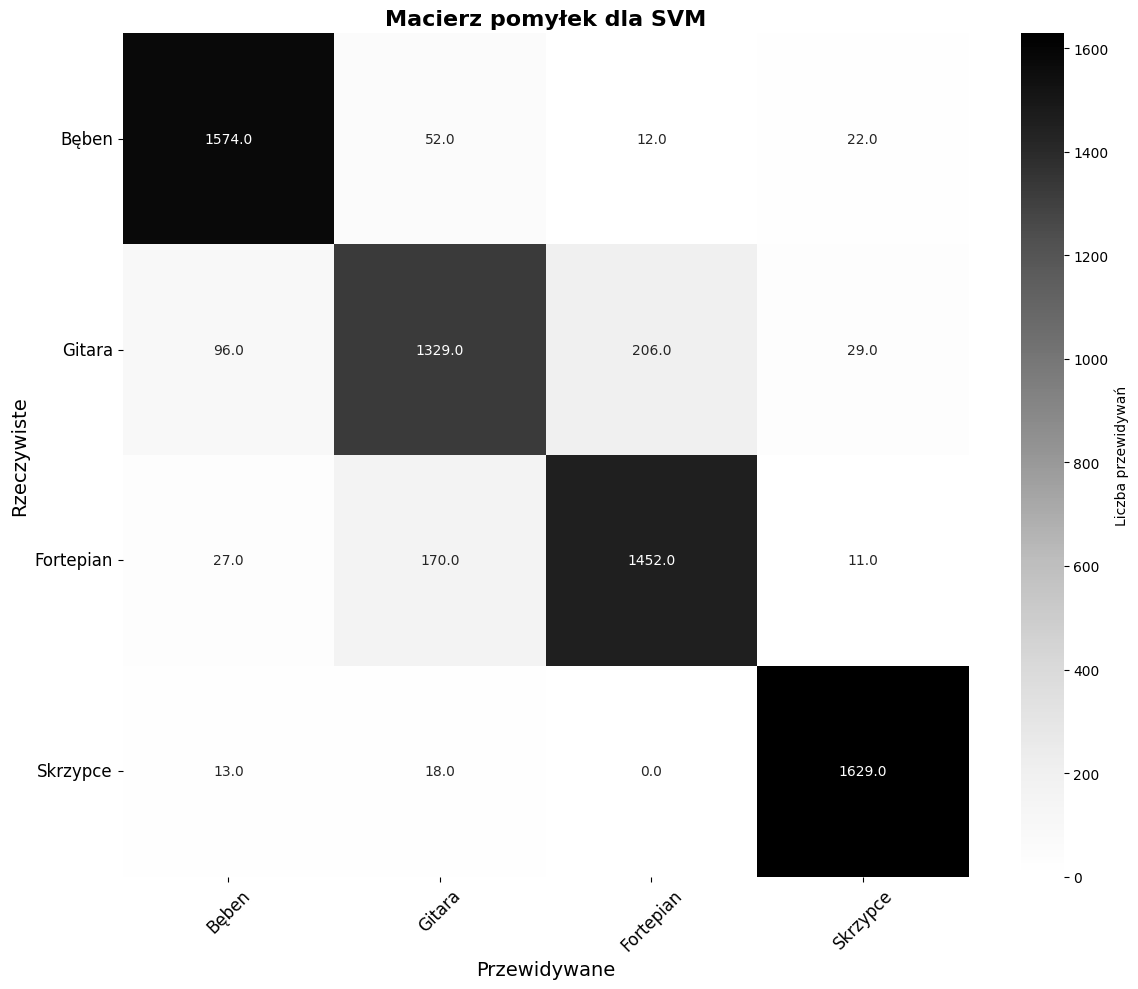

In [6]:
model = SVC(kernel='rbf', C=10, random_state=42)

start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

unique_labels = y_test.unique()
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(" SVM:")
print(f"  Dokładność (Accuracy): {accuracy:.4f}")
print(f"  Precyzja (Precision): {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Czas treningu: {training_time:.4f} sekund")


print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(label) for label in sorted(unique_labels)]))


label_mapping = {
    0: "Bęben",
    1: "Gitara",
    2: "Fortepian",
    3: "Skrzypce"
}

sorted_labels = np.sort(unique_labels)
mapped_labels = [label_mapping[label] for label in sorted_labels]
conf_matrix = confusion_matrix(y_test, y_pred, labels=sorted_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".1f", cmap="Greys", 
            xticklabels=mapped_labels, yticklabels=mapped_labels, cbar_kws={'label': 'Liczba przewidywań'})

plt.xlabel("Przewidywane", fontsize=14)
plt.ylabel("Rzeczywiste", fontsize=14)
plt.title("Macierz pomyłek dla SVM", fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

## 30 cech

In [5]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_30_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_30_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
svm_results = []

for kernel in kernel_types:
    for C in C_values:
            try:
                clf = SVC(kernel=kernel, C=C, random_state=42)

                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                y_pred = clf.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                svm_results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with Kernel={kernel}, C={C} {e}")


metrics_svc = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_svc_models = {metric: max(svm_results, key=lambda x: x[metric]) for metric in metrics_svc}
best_svc_models['Training Time'] = min(svm_results, key=lambda x: x['Training Time (s)'])


all_models_svc_table = [
    [res['Kernel'], res['C'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in svm_results
]

best_models_svc_table = [
    [metric, 
     best_svc_models[metric]['Kernel'], 
     best_svc_models[metric]['C'],  
     best_svc_models[metric]['Accuracy'], 
     best_svc_models[metric]['Precision'], 
     best_svc_models[metric]['Recall'], 
     best_svc_models[metric]['F1 Score'], 
     best_svc_models[metric]['Training Time (s)']]
    for metric in metrics_svc + ['Training Time']
]

print("Best Models (SVC):")
print(tabulate(best_models_svc_table, headers=[
    "Metric", "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


In [ ]:
print(tabulate(all_models_svc_table, headers=[
    "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

## 50 cech

In [18]:
train_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/train_50_mfcc_features_with_labels_1sec.csv")  
test_data = pd.read_csv("Sounds_1_seconds/mfcc_1_sec/test_50_mfcc_features_with_labels_1sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
svm_results = []

for kernel in kernel_types:
    for C in C_values:
            try:
                clf = SVC(kernel=kernel, C=C, random_state=42)

                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                y_pred = clf.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                svm_results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with Kernel={kernel}, C={C} {e}")


metrics_svc = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_svc_models = {metric: max(svm_results, key=lambda x: x[metric]) for metric in metrics_svc}
best_svc_models['Training Time'] = min(svm_results, key=lambda x: x['Training Time (s)'])


all_models_svc_table = [
    [res['Kernel'], res['C'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in svm_results
]

best_models_svc_table = [
    [metric, 
     best_svc_models[metric]['Kernel'], 
     best_svc_models[metric]['C'],  
     best_svc_models[metric]['Accuracy'], 
     best_svc_models[metric]['Precision'], 
     best_svc_models[metric]['Recall'], 
     best_svc_models[metric]['F1 Score'], 
     best_svc_models[metric]['Training Time (s)']]
    for metric in metrics_svc + ['Training Time']
]

print("Best Models (SVC):")
print(tabulate(best_models_svc_table, headers=[
    "Metric", "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


In [ ]:
print(tabulate(all_models_svc_table, headers=[
    "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

# 3 sekundowe pliki

In [16]:
train_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/train_13_mfcc_features_with_labels_3sec.csv")  
test_data = pd.read_csv("Sounds_3_seconds/mfcc_3_sec/test_13_mfcc_features_with_labels_3sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
svm_results = []

for kernel in kernel_types:
    for C in C_values:
            try:
                clf = SVC(kernel=kernel, C=C, random_state=42)

                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                y_pred = clf.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                svm_results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with Kernel={kernel}, C={C} {e}")


metrics_svc = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_svc_models = {metric: max(svm_results, key=lambda x: x[metric]) for metric in metrics_svc}
best_svc_models['Training Time'] = min(svm_results, key=lambda x: x['Training Time (s)'])


all_models_svc_table = [
    [res['Kernel'], res['C'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in svm_results
]

best_models_svc_table = [
    [metric, 
     best_svc_models[metric]['Kernel'], 
     best_svc_models[metric]['C'],  
     best_svc_models[metric]['Accuracy'], 
     best_svc_models[metric]['Precision'], 
     best_svc_models[metric]['Recall'], 
     best_svc_models[metric]['F1 Score'], 
     best_svc_models[metric]['Training Time (s)']]
    for metric in metrics_svc + ['Training Time']
]

print("Best Models (SVC):")
print(tabulate(best_models_svc_table, headers=[
    "Metric", "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


In [ ]:
print(tabulate(all_models_svc_table, headers=[
    "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))

# 5 sekundowe pliki

In [14]:
train_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/train_13_mfcc_features_with_labels_5sec.csv")  
test_data = pd.read_csv("Sounds_5_seconds/mfcc_5_sec/test_13_mfcc_features_with_labels_5sec.csv")    

X_train = train_data.drop(['Encoded_label'], axis=1) 
y_train = train_data['Encoded_label']  

X_test = test_data.drop(['Encoded_label'], axis=1)  
y_test = test_data['Encoded_label']

In [ ]:
svm_results = []

for kernel in kernel_types:
    for C in C_values:
            try:
                clf = SVC(kernel=kernel, C=C, random_state=42)

                start_time = time.time()
                clf.fit(X_train, y_train)
                training_time = time.time() - start_time
                y_pred = clf.predict(X_test)

                accuracy = accuracy_score(y_test, y_pred)
                precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(y_test, y_pred, average='weighted')
                f1 = f1_score(y_test, y_pred, average='weighted')

                svm_results.append({
                    'Kernel': kernel,
                    'C': C,
                    'Accuracy': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1 Score': f1,
                    'Training Time (s)': training_time
                })
            except Exception as e:
                print(f"Error with Kernel={kernel}, C={C} {e}")


metrics_svc = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
best_svc_models = {metric: max(svm_results, key=lambda x: x[metric]) for metric in metrics_svc}
best_svc_models['Training Time'] = min(svm_results, key=lambda x: x['Training Time (s)'])


all_models_svc_table = [
    [res['Kernel'], res['C'], res['Accuracy'], res['Precision'], 
     res['Recall'], res['F1 Score'], res['Training Time (s)']]
    for res in svm_results
]

best_models_svc_table = [
    [metric, 
     best_svc_models[metric]['Kernel'], 
     best_svc_models[metric]['C'],  
     best_svc_models[metric]['Accuracy'], 
     best_svc_models[metric]['Precision'], 
     best_svc_models[metric]['Recall'], 
     best_svc_models[metric]['F1 Score'], 
     best_svc_models[metric]['Training Time (s)']]
    for metric in metrics_svc + ['Training Time']
]

print("Best Models (SVC):")
print(tabulate(best_models_svc_table, headers=[
    "Metric", "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))


In [ ]:
print(tabulate(all_models_svc_table, headers=[
    "Kernel", "C", "Accuracy", "Precision", "Recall", "F1 Score", "Training Time (s)"
], tablefmt="fancy_grid"))